## Producing Quick and Easy Plots of Topology within OpenPNM

The main way to visualize OpenPNM networks is Paraview, but this can be a bit a hassle when building a new network topology that needs quick feedback for troubleshooting. Starting in V1.6, OpenPNM offers two plotting functions for showing pore locations and the connections between them: OpenPNM.Network.tools.plot_coordinates and OpenPNM.Network.tools.plot_connections. This example demonstrates how to use these two methods.

Start by initializing OpenPNM and creating a network. For easier visualization we'll use a 2D network:

In [1]:
import openpnm as op
net = op.network.Cubic(shape=[5, 5, 1])

C:\Users\Tom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Next we'll add boundary pores to two sides of the network, to better illustrate these plot commands:

In [2]:
net.add_boundary_pores(['left', 'right'])

Now let's use ``plot_coordinates`` to plot the pore centers in a 3D plot, starting with the internal pores:

In [3]:
fig = op.topotools.plot_coordinates(network=net, pores=net.pores('internal'), c='r')
ax = fig.gca()  # This line is only needed in Jupyter notebooks

Note that the above call to plot_coordinates returns a figure handle fig. This can be passed into subsequent plotting methods to overlay points.

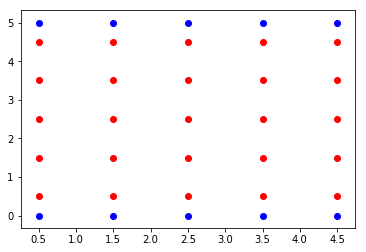

In [4]:
Ps = net.pores('*boundary')
fig = op.topotools.plot_coordinates(network=net, pores=Ps, fig=fig, c='b')
ax.get_figure()  # This line is only needed in Jupyter notebooks

Next, let's add lines to the above plot indicating the throat connections. Again, by reusing the fig object we can overlay more information:

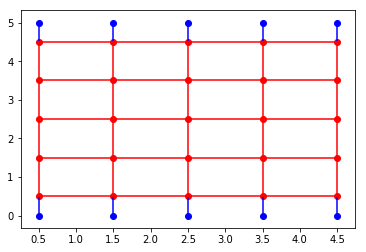

In [5]:
Ts = net.find_neighbor_throats(pores=Ps)
fig = op.topotools.plot_connections(network=net, throats=Ts, fig=fig, c='b')
Ts = net.find_neighbor_throats(pores=net.pores('internal'), mode='intersection')
fig = op.topotools.plot_connections(network=net, throats=Ts, fig=fig, c='r')
ax.get_figure()  # This line is only needed in Jupyter notebooks